# Calibration Belt
### Assessment of the calibration belt and goodness of fit of binomial models.

## Installation

`pip install calibration-belt`

In [1]:
import pandas as pd
from pathlib import Path
from calibration import CalibrationBelt

import matplotlib.pyplot as plt
%matplotlib inline  

## Loading data

In [2]:
df = pd.read_csv(Path('tests/data/example_data.csv'))

# Separate P (outcome) and E (probability outputed by the model)
# In this case we will evaluate two different models
P = df.target.to_numpy()
predictors = {
    'SVM': df.SVM.to_numpy(),
    'NN': df.NN.to_numpy()
}

## CalibrationBelt object

In [3]:
# We create CalibrationBelt objects for 
# each model we want to evaluate
belts = {}
for key, E in predictors.items():
    belts[key] = CalibrationBelt(P, E)

## Plotting the belt

100%|██████████| 50/50 [00:03<00:00, 15.80it/s]


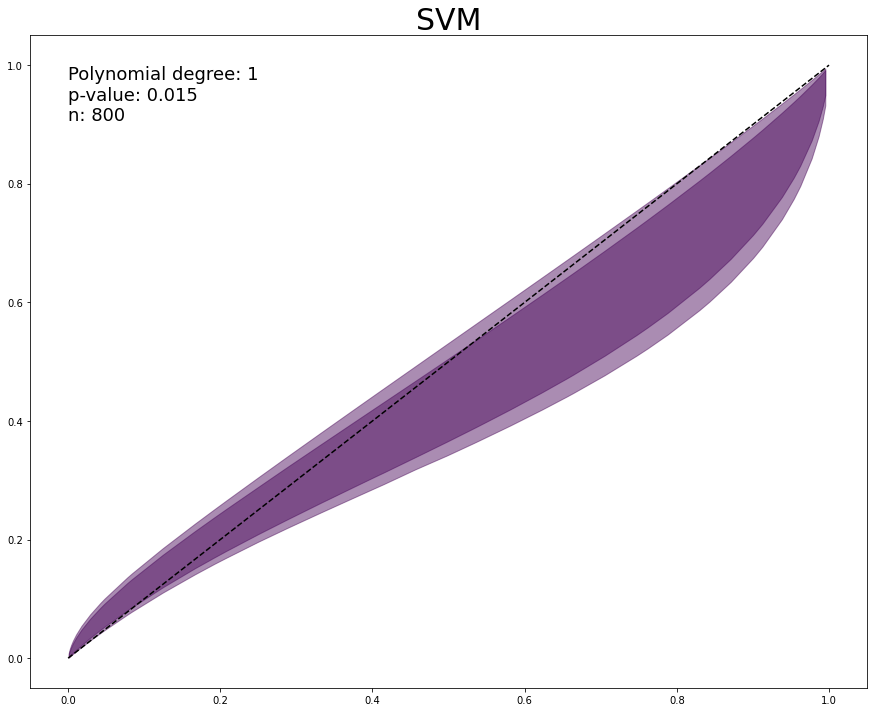

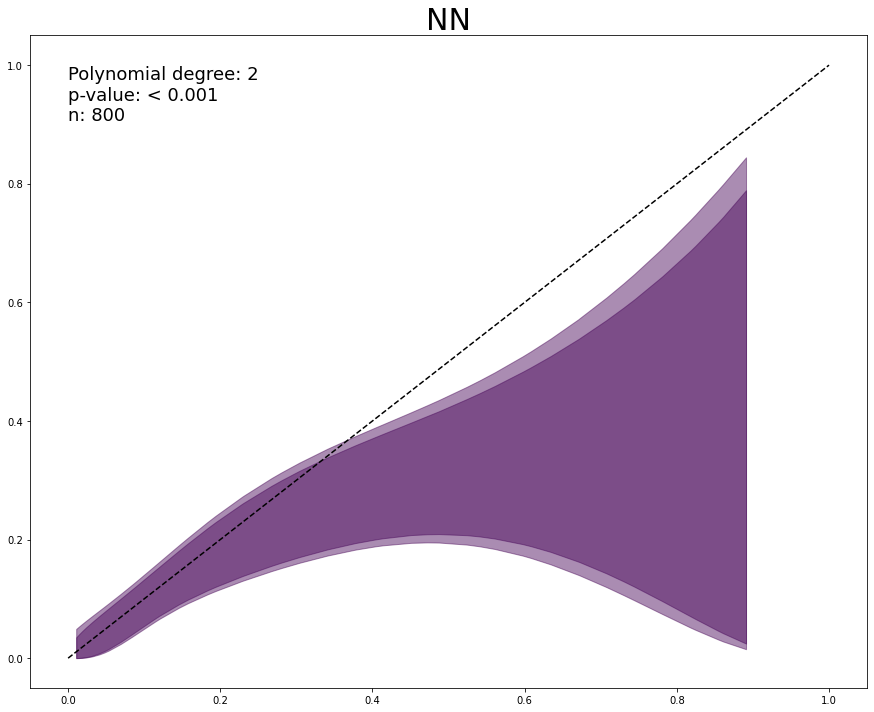

In [4]:
# Calculate belt in the confidence intervals .8 and .95
for model, belt in belts.items():
    fig, ax  = belt.plot(confidences=[.8, .95])
    ax.set_title(model, fontsize=30)

## Calculating T-statistic and p_value

In [5]:
for model, belt in belts.items():
    T, p_value = belt.test()
    print(f"Model: {model:3}, T-statistic: {T:08.5f} , p-value: {p_value:07.5f}")

Model: SVM, T-statistic: 08.37500 , p-value: 0.01518
Model: NN , T-statistic: 31.05418 , p-value: 0.00001


## Calculating boundaries of the belt

In [6]:
boundaries = belt.calculate_boundaries(.95)
lower, upper = boundaries[0, 1:]
print(f"Lower bound: {lower:.4f}, Upper bound: {upper:.4f}")

Lower bound: 0.0001, Upper bound: 0.0493


## Cumulative distribution function

The plot below shows the computed distribution of the T-statistic in polynomials of degree m.

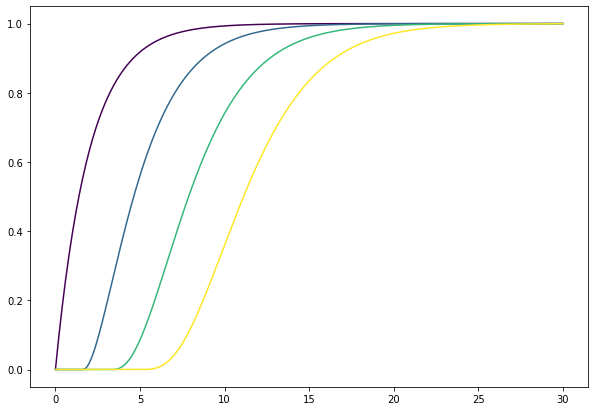

In [7]:
T = [i / 10 for i in range(0, 301)]
viridis = plt.cm.get_cmap("viridis", 4)
fig, ax = plt.subplots(1, figsize=[10, 7])
for m in [1, 2, 3, 4]:
    cdf = []
    for t in T:
        cdf.append(CalibrationBelt.calculate_cdf(t, m, .8))  
    ax.plot(T, cdf, color=viridis(m-1))

# References

Based on `Nattino, Giovanni, Stefano Finazzi, and Guido Bertolini. "A new calibration test and a reappraisal of the calibration belt for the assessment of prediction models based on dichotomous outcomes." Statistics in medicine 33.14 (2014): 2390-2407.`